In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the csv file:
df = pd.read_csv(r'/content/Cyberattacks Detection.csv')

In [4]:
#Data set columns and records count:
print("Number of Columns :",len(df.columns))
print("Number of Records :",len(df))

Number of Columns : 16
Number of Records : 100000


In [5]:
#Displaying first five records:
df.head()

,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
0,1.0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Detected,0.600507,K-Nearest Neighbors,Cloud Storage,Other,NaN
1,2.0,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Detected,0.524150,K-Nearest Neighbors,Network Router,Other,NaN
2,4.0,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Not Detected,0.238944,Neural Network,Workstation,Other,NaN
3,5.0,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Not Detected,0.122334,Neural Network,Workstation,Other,NaN
4,6.0,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Detected,0.970895,Neural Network,Application Server,Other,NaN


In [6]:
# Data preprocessing
df = df.dropna()
df = df.drop_duplicates(keep=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 90174 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Attack ID             9826 non-null   float64
 1   Source IP             9826 non-null   object 
 2   Destination IP        9826 non-null   object 
 3   Source Country        9826 non-null   object 
 4   Destination Country   9826 non-null   object 
 5   Protocol              9826 non-null   object 
 6   Source Port           9826 non-null   float64
 7   Destination Port      9826 non-null   float64
 8   Attack Type           9826 non-null   object 
 9   Payload Size (bytes)  9826 non-null   float64
 10  Detection Label       9826 non-null   object 
 11  Confidence Score      9826 non-null   float64
 12  ML Model              9826 non-null   object 
 13  Affected System       9826 non-null   object 
 14  Port Type             9826 non-null   object 
 15  Timestamp            

In [8]:
# Summary Statistics:
print(df.describe())

           Attack ID   Source Port  Destination Port  Payload Size (bytes)  \
count    9826.000000   9826.000000       9826.000000           9826.000000   
mean    95087.500000  32836.688581      32638.598005           2535.603297   
std      2836.666206  18842.315367      19020.942616           1444.186110   
min     90175.000000     28.000000          1.000000              1.000000   
25%     92631.250000  16625.750000      15867.000000           1287.250000   
50%     95087.500000  32878.000000      32768.500000           2554.000000   
75%     97543.750000  49119.000000      49171.500000           3783.000000   
max    100000.000000  65531.000000      65521.000000           4999.000000   

       Confidence Score  
count       9826.000000  
mean           0.496972  
std            0.293658  
min            0.000313  
25%            0.237276  
50%            0.500016  
75%            0.753829  
max            0.999980  


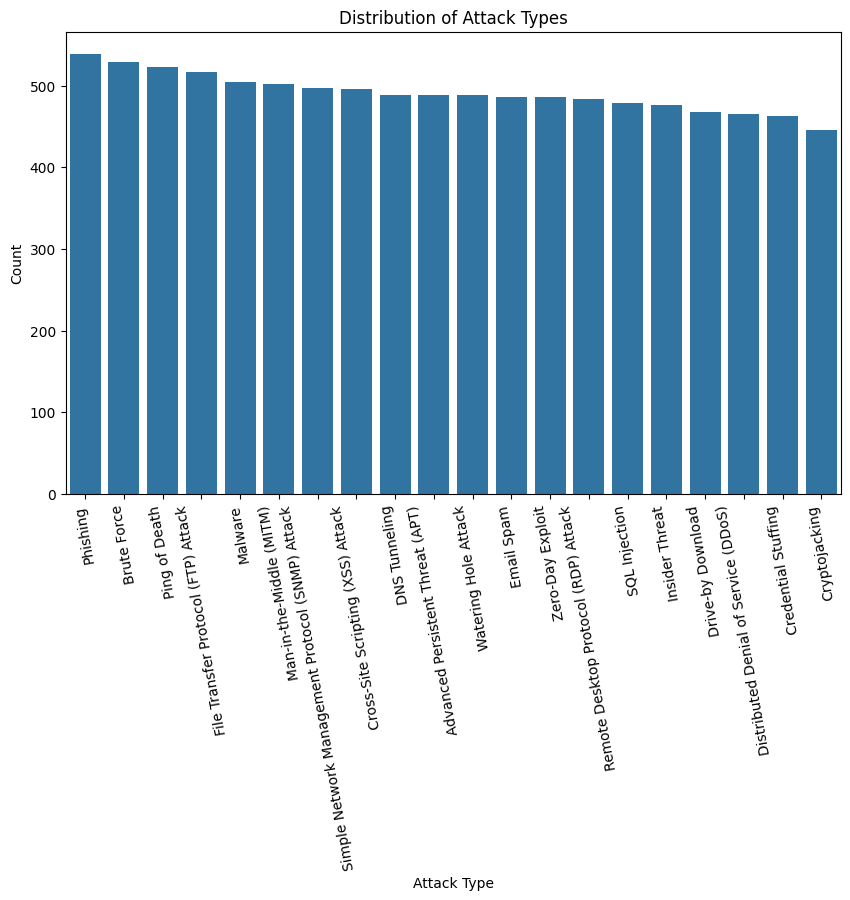

In [9]:
# EDA 1: Distribution of Attack Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show()


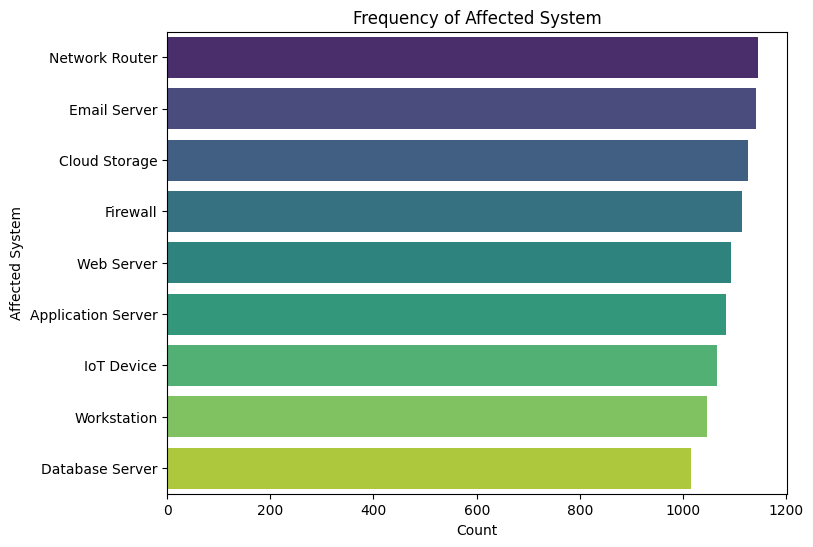

In [10]:
# EDA 2: Frequency of Affected System
plt.figure(figsize=(8, 6))
sns.countplot(y="Affected System", data=df, order=df["Affected System"].value_counts().index, palette="viridis")
plt.title("Frequency of Affected System")
plt.xlabel("Count")
plt.ylabel("Affected System")
plt.show()

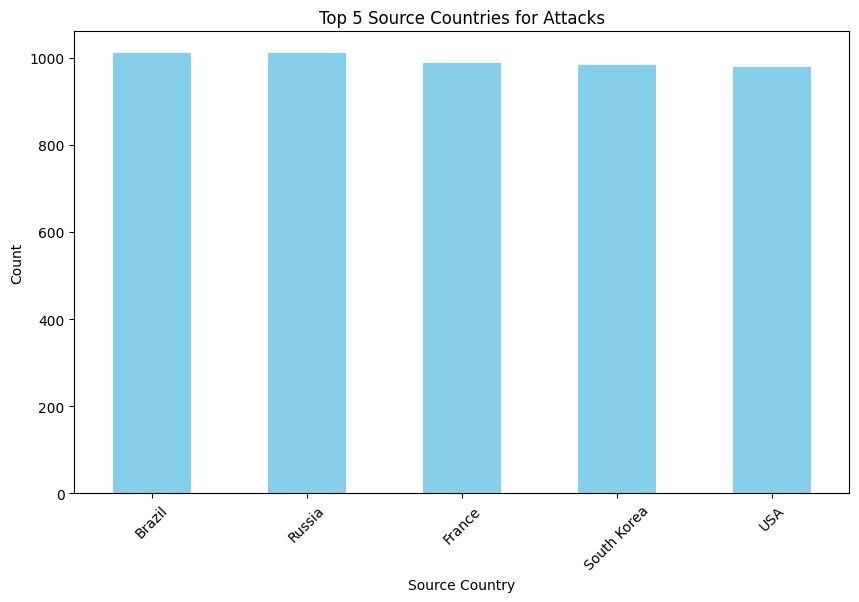

In [11]:
# EDA 3: Top Source Countries for Attacks
plt.figure(figsize=(10, 6))
top_countries = df['Source Country'].value_counts().head(5)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Source Countries for Attacks')
plt.xlabel('Source Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

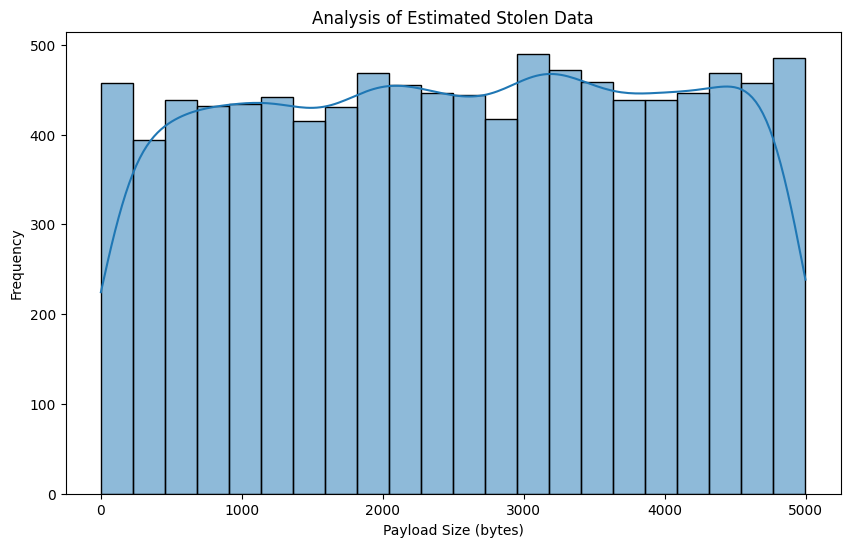

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Payload Size (bytes)'],kde=True)
plt.title('Analysis of Estimated Stolen Data')
plt.xlabel('Payload Size (bytes)')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Export to CSV
df.to_csv("cyber_shield.csv", index=False)